In [9]:
from env import VanillaEnv, CrafterReplayBuffer
import numpy as np
import matplotlib.pyplot as plt
import os
import random


c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\engine.py:126: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename.read_bytes())
c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\worldgen.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tunnels = np.zeros(world.area, np.bool)


Done! Episode Reward:  2.1
(3, 64, 64)


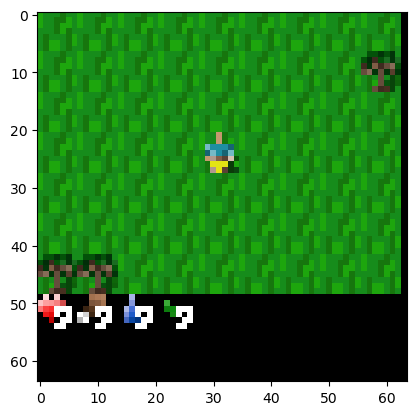

In [14]:
env =  VanillaEnv(seed=4)
state = env.reset()
done = False
rewards = []
frames_arr = []

while not done:
    action = np.random.randint(low=0, high=17)
    next_state, r, done, info = env.step(action)
    rewards.append(r)
    frames_arr.append(state)
    state = next_state
    if done: 
        print("Done! Episode Reward: ", np.sum(rewards))
        print(frames_arr[0].shape)
        plt.imshow(np.moveaxis(frames_arr[0], 0, -1), vmin=0., vmax=1.)
        break

In [3]:
buffer = CrafterReplayBuffer('cpu', 0, './dataset')

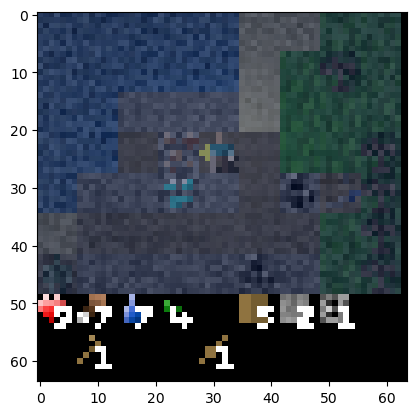

In [4]:
image, action = buffer.sample(1)
plt.imshow(np.moveaxis(image.numpy().squeeze(), 0, -1), vmin=0., vmax=1.)

c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\engine.py:126: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename.read_bytes())
c:\Users\manus\miniconda3\envs\master\lib\site-packages\crafter\worldgen.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tunnels = np.zeros(world.area, np.bool)


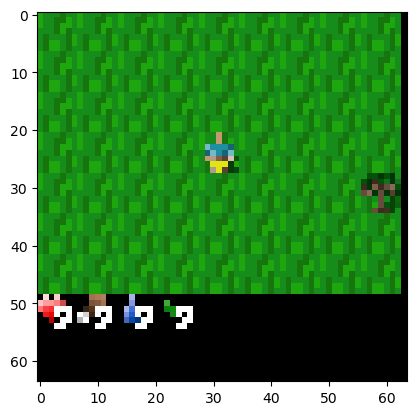

In [5]:
import gym
import crafter

env = env = crafter.Env(seed="6alZBPJBjvEr2YMpv6VDbP")  # Or CrafterNoReward-v1
env = crafter.Recorder(
  env, './path/to/logdir',
  save_stats=True,
  save_video=False,
  save_episode=False,
)
obs = env.reset()
plt.imshow(obs)


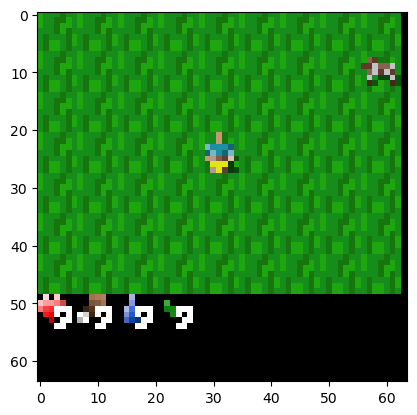

In [6]:
with np.load("./dataset" + os.sep + "6alZBPJBjvEr2YMpv6VDbP.npz") as data:
    plt.imshow(data['image'][0])

In [7]:
print(env.action_space)

Discrete(17)


In [8]:
from policy import ActorNet

model = ActorNet()

X, y = buffer.sample(23)
print(X.shape)
print(X.dtype)

model.forward(X, contrastive=False)

torch.Size([23, 3, 64, 64])
torch.float32


tensor([[ 0.0647, -0.0243,  0.0540,  0.0327,  0.0257, -0.0351, -0.0355,  0.0356,
          0.0039, -0.0420,  0.0661, -0.0719,  0.0468, -0.0511, -0.0439, -0.0797,
         -0.0424],
        [ 0.0674, -0.0258,  0.0555,  0.0279,  0.0234, -0.0349, -0.0402,  0.0321,
          0.0034, -0.0452,  0.0648, -0.0718,  0.0455, -0.0536, -0.0431, -0.0824,
         -0.0398],
        [ 0.0604, -0.0265,  0.0569,  0.0284,  0.0187, -0.0379, -0.0311,  0.0364,
          0.0024, -0.0358,  0.0668, -0.0719,  0.0475, -0.0564, -0.0458, -0.0784,
         -0.0391],
        [ 0.0627, -0.0234,  0.0567,  0.0361,  0.0224, -0.0346, -0.0330,  0.0364,
          0.0075, -0.0359,  0.0651, -0.0706,  0.0477, -0.0562, -0.0379, -0.0779,
         -0.0398],
        [ 0.0640, -0.0305,  0.0622,  0.0287,  0.0226, -0.0316, -0.0334,  0.0319,
          0.0038, -0.0370,  0.0728, -0.0740,  0.0494, -0.0571, -0.0453, -0.0873,
         -0.0396],
        [ 0.0610, -0.0293,  0.0550,  0.0318,  0.0261, -0.0331, -0.0369,  0.0331,
          0.00